In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [48]:
test.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Feature selection 

In [49]:
X = train.iloc[:,0:80]  #independent columns
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [50]:
X = pd.get_dummies(data=X, drop_first=True)
X=X.fillna(0)
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


In [51]:
y = train.iloc[:,-1]    #target column i.e price range\
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [53]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10)

[2.47180513e-02 1.23098678e-02 1.98241712e-02 2.12066602e-02
 1.45163256e-02 1.21067038e-02 2.24332608e-02 1.95422424e-02
 1.34986172e-02 1.87923920e-02 5.14803880e-03 2.21015213e-02
 2.37184911e-02 2.15673653e-02 1.43314552e-02 9.62955021e-04
 2.10459870e-02 1.18724347e-02 3.10345907e-03 7.52146109e-03
 9.78049000e-03 1.24790657e-02 1.74663645e-03 1.82411700e-02
 1.10534355e-02 1.90530349e-02 1.15762144e-02 2.24952531e-02
 1.83724180e-02 1.67928202e-02 5.37378958e-03 1.17010149e-03
 5.93496622e-03 6.19749695e-04 1.43966500e-03 2.34241830e-02
 2.00290977e-02 1.61292517e-03 6.70387565e-04 6.04702203e-03
 3.63866605e-03 1.38672056e-04 1.45239291e-03 2.42095956e-03
 5.53885748e-04 1.01476461e-02 1.76798597e-03 1.29265462e-03
 5.08844192e-03 0.00000000e+00 4.31788509e-03 2.65613961e-03
 3.43725154e-04 1.18387440e-02 3.06801129e-03 4.84732284e-04
 6.87113793e-05 7.02019612e-04 1.78183218e-03 1.23139567e-03
 5.42007245e-03 1.64135571e-03 2.82000822e-03 2.34303276e-03
 1.66872708e-03 3.645050

Id             0.024718
TotalBsmtSF    0.023718
MoSold         0.023424
GarageArea     0.022495
YearBuilt      0.022433
BsmtUnfSF      0.022102
1stFlrSF       0.021567
LotArea        0.021207
GrLivArea      0.021046
YrSold         0.020029
dtype: float64

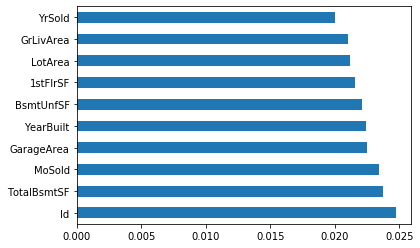

In [54]:

feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [55]:
col=feat_importances.nlargest(10)
col1=pd.DataFrame(col)
col1

,0
Id,0.024718
TotalBsmtSF,0.023718
MoSold,0.023424
GarageArea,0.022495
YearBuilt,0.022433
BsmtUnfSF,0.022102
1stFlrSF,0.021567
LotArea,0.021207
GrLivArea,0.021046
YrSold,0.020029


In [56]:
XX=X[['Id','YrSold','1stFlrSF','LotFrontage','GrLivArea','LotArea','GarageArea','TotalBsmtSF','YearBuilt','BsmtUnfSF']]
XX

,Id,YrSold,1stFlrSF,LotFrontage,GrLivArea,LotArea,GarageArea,TotalBsmtSF,YearBuilt,BsmtUnfSF
0,1,2008,856,65.0,1710,8450,548,856,2003,150
1,2,2007,1262,80.0,1262,9600,460,1262,1976,284
2,3,2008,920,68.0,1786,11250,608,920,2001,434
3,4,2006,961,60.0,1717,9550,642,756,1915,540
4,5,2008,1145,84.0,2198,14260,836,1145,2000,490
...,...,...,...,...,...,...,...,...,...,...
1455,1456,2007,953,62.0,1647,7917,460,953,1999,953
1456,1457,2010,2073,85.0,2073,13175,500,1542,1978,589
1457,1458,2010,1188,66.0,2340,9042,252,1152,1941,877
1458,1459,2010,1078,68.0,1078,9717,240,1078,1950,0


In [57]:
XX.isnull().sum()

Id             0
YrSold         0
1stFlrSF       0
LotFrontage    0
GrLivArea      0
LotArea        0
GarageArea     0
TotalBsmtSF    0
YearBuilt      0
BsmtUnfSF      0
dtype: int64

In [58]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# module tuning 

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=101)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 10)
(292, 10)
(1168,)
(292,)


In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# print the intercept
print(model.intercept_)

-2069125.0941322616


In [66]:
coeff_parameter = pd.DataFrame(model.coef_,XX.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Id,-1.447724
YrSold,356.152597
1stFlrSF,-6.735096
LotFrontage,108.703892
GrLivArea,74.652331
LotArea,0.400756
GarageArea,56.851805
TotalBsmtSF,59.952276
YearBuilt,680.411833
BsmtUnfSF,-19.941379


In [67]:
predictions = model.predict(X_test)
predictions

array([ 2.55960524e+05,  1.31796861e+05,  1.53101729e+05,  3.39119496e+05,
        3.24958342e+05,  8.79518606e+04,  1.61138916e+05,  1.49478069e+05,
        1.68926647e+05,  1.57356530e+05,  1.30087579e+05,  1.60889301e+05,
        1.57928630e+05,  1.49688816e+05,  1.88070645e+05,  1.97353298e+05,
        1.98354269e+05,  1.17957689e+05,  1.51497621e+05,  2.46116359e+05,
        1.43549746e+05,  4.93171481e+04,  2.17923195e+05,  1.57812681e+05,
        2.22459892e+05,  1.39730754e+05,  9.99509621e+04,  1.99697691e+05,
        1.87301084e+05,  1.27909797e+05,  2.20717889e+05,  1.84303161e+05,
        1.88182673e+05,  2.53706818e+05, -8.95159667e+02,  7.59077046e+04,
        3.39833478e+05,  2.32591774e+05,  1.24184488e+05,  6.11828945e+04,
        2.60573710e+05,  2.12049452e+05,  2.27629631e+05,  1.76270547e+05,
        1.73145155e+05,  1.70548952e+05,  2.88536979e+05,  1.86440325e+05,
        1.30724418e+05,  1.45122393e+05,  2.09375222e+05,  3.10570076e+05,
        8.17726233e+04,  

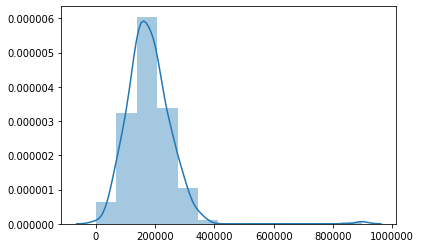

In [68]:
sns.distplot(predictions,bins=13)

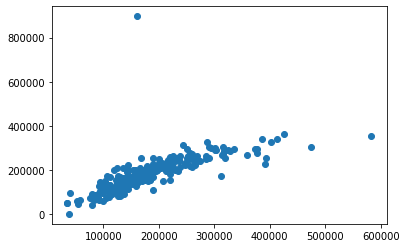

In [69]:
plt.scatter(y_test,predictions)

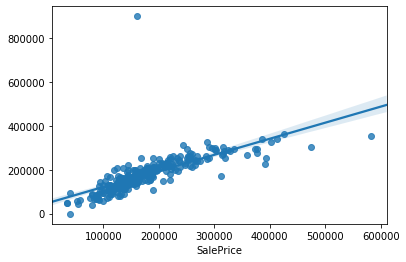

In [70]:
sns.regplot(y_test,predictions)

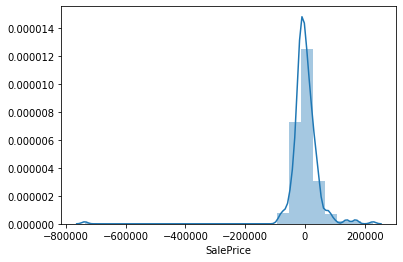

In [71]:
sns.distplot((y_test-predictions),bins=24);

In [104]:
from sklearn import metrics
import numpy as np

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 27548.8076681077
MSE: 3235343475.142155
RMSE: 56880.079774400416


In [106]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

In [107]:
X_train_Sm= sm.add_constant(X_train)

In [108]:
ls=sm.OLS(y_train,X_train_Sm).fit()

In [109]:
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:47:49   Log-Likelihood:                -13983.
No. Observations:                1168   AIC:                         2.799e+04
Df Residuals:                    1157   BIC:                         2.804e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.069e+06   1.71e+06     -1.209      

# Predicting the test result

In [75]:
test = pd.get_dummies(data=test, drop_first=True)
test=test.fillna(0)

In [77]:
XX_t=test[['Id','YrSold','1stFlrSF','LotFrontage','GrLivArea','LotArea','GarageArea','TotalBsmtSF','YearBuilt','BsmtUnfSF']]
XX_t

,Id,YrSold,1stFlrSF,LotFrontage,GrLivArea,LotArea,GarageArea,TotalBsmtSF,YearBuilt,BsmtUnfSF
0,1461,2010,896,80.0,896,11622,730.0,882.0,1961,270.0
1,1462,2010,1329,81.0,1329,14267,312.0,1329.0,1958,406.0
2,1463,2010,928,74.0,1629,13830,482.0,928.0,1997,137.0
3,1464,2010,926,78.0,1604,9978,470.0,926.0,1998,324.0
4,1465,2010,1280,43.0,1280,5005,506.0,1280.0,1992,1017.0
...,...,...,...,...,...,...,...,...,...,...
1454,2915,2006,546,21.0,1092,1936,0.0,546.0,1970,546.0
1455,2916,2006,546,21.0,1092,1894,286.0,546.0,1970,294.0
1456,2917,2006,1224,160.0,1224,20000,576.0,1224.0,1960,0.0
1457,2918,2006,970,62.0,970,10441,0.0,912.0,1992,575.0


In [78]:
predictions_T = model.predict(XX_t)
predictions_T

array([142117.39687142, 170974.16543151, 212657.36935902, ...,
       189367.85900738, 116486.76268291, 243570.65557446])

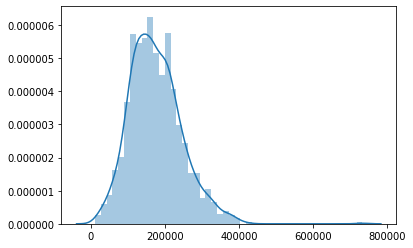

In [79]:
sns.distplot(predictions_T)

In [95]:
sales_price_predt=pd.DataFrame(predictions_T,columns=['sales_price'])
sales_price_predt

,sales_price
0,142117.396871
1,170974.165432
2,212657.369359
3,205843.435159
4,178840.737084
...,...
1454,84255.788919
1455,105522.352940
1456,189367.859007
1457,116486.762683


In [110]:
test['SalePrice']=predictions_T

In [116]:
finla_Submission=test[['Id','Sales_Price']]
finla_Submission.to_csv('adv_housing_price_Sales.csv')